# Lab 2: Text Data Visualization

Objectives:
- To gain more practice in exploring and pre-processing text data.
- To create visualization for the textual data using the techniques introduced in class.

***

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Download the data (UN General Debate)

In [2]:
# !wget https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/193c79c7d94973f2398e67da8d20bf7a535f7f40/data/un-general-debates/un-general-debates-blueprint.csv.gz

Read the data

In [3]:
import pandas as pd
df = pd.read_csv('un-general-debates-blueprint.csv.gz', compression='gzip')
df

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14180\629987728.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


## EDA - Explore more about this dataset

Add new column which presents length of the text

In [4]:
df['length'] = df['text'].str.len()

In [5]:
df

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247


List all columns in this dataset

In [6]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

Types of data for each column

In [7]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

All information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


For all integer-typed columns, find out their stats

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


Investigate: Any missing data?

In [10]:
# Missing data
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

Address the missing data in the column "speaker" by replacing those missing values with 'unknown'.

In [11]:
df['speaker'].fillna('unknown',inplace=True)
df.isna().sum()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14180\3617655558.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker'].fillna('unknown',inplace=True)


session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

Find out all unique speakers in this dataset.

In [12]:
pd.unique(df['speaker'])

array(['Mr. NAS', 'Mr. DE PABLO PARDO', 'Mr. McMAHON', ...,
       'Mr. Abdrabuh Mansour Hadi Mansour', 'Mr. Tomislav Nikolić',
       'Mr. Edgar Chagwa Lungu'], dtype=object)

In [13]:
len(pd.unique(df['speaker']))

5429

Filter only records of which the speaker is President 'Bush'.

In [14]:
df[df['speaker'].str.contains('Bush')]

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,Bush,President,﻿I am honoured to address the General Assembly...,19779
3038,46,1991,USA,United States,George Bush,President,﻿I am honoured to speak with you as you open t...,15555
4814,56,2001,USA,United States,George W. Bush,President,﻿We meet in a Hall devoted to\npeace; in a cit...,14724
5002,57,2002,USA,United States,Mr. George W. Bush,President,﻿We meet one year and one day\nafter a terrori...,16684
5191,58,2003,USA,United States,George W. Bush,President,"﻿Twenty-four months ago, and\nyesterday in the...",16962
5382,59,2004,USA,United States,Mr. George W Bush,President,Thank you for the honour of\naddressing the Ge...,18628
5760,61,2006,USA,United States,Mr. George W. Bush,President,I am grateful for the privilege of \nspeaking ...,16675
5951,62,2007,USA,United States,George W. Bush,President,Thank you for the opportunity \nto address the...,15483
6143,63,2008,USA,United States,George W. Bush,President,I am pleased to be here to \naddress the Gener...,18384


Select text from a particular row

In [15]:
temp = df[df['speaker'].str.contains('Bush')]
temp.iloc[[2]].text.values


array(['\ufeffWe meet in a Hall devoted to\npeace; in a city scarred by violence; in a nation\nawakened to danger; in a world uniting for a long\nstruggle. Every civilized nation here today is resolved\nto keep the most basic commitment of civilization. We\nwill defend ourselves and our future against terror and\nlawless violence.\nThe United Nations was founded in this cause. In\nthe Second World War, we learned that there is no\nisolation from evil. We affirmed that some crimes are\nso terrible they offend humanity itself, and we resolved\nthat the aggressions and ambitions of the wicked must\nbe opposed early, decisively and collectively, before\nthey threaten us all.\nThat evil has returned, and that cause is renewed.\nA few miles from here, many thousands still lie in a\ntomb of rubble. Tomorrow, the Secretary-General, the\nPresident of the General Assembly and I will visit that\nsite, where the names of every nation and region that\nlost citizens will be read aloud. If we were to

## Tasks

Select 3 speeches from different people and perform the following:
- Pre-process each speech using techniques taught in class
- Find top 10 words
- Select proper text visualization technique (at least 2 techniques) to gain more insights about the speech
- Briefly describe the insights you gain from the visualizations that you create

In [16]:
selected_speeches = df.loc[[7495, 6336, 5382], :]
selected_speeches

,session,year,country,country_name,speaker,position,text,length
7495,70,2015,USA,United States,Barack Obama,President,Seventy years after the founding of the United...,28300
6336,64,2009,USA,United States,Barack Obama,President,It is my honour to address the \nAssembly for ...,30245
5382,59,2004,USA,United States,Mr. George W Bush,President,Thank you for the honour of\naddressing the Ge...,18628


In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

# Define a function for pre-processing
def preprocess(text):
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in lemmatized_tokens if word.isalpha() and word.lower() not in stop_words]
    
    return filtered_tokens

In [18]:
# Apply pre-processing to each speech
selected_speeches['processed_text'] = selected_speeches['text'].apply(preprocess)

# Find top 10 words
top_words = [word for sublist in selected_speeches['processed_text'] for word in sublist]
top_10_words = nltk.FreqDist(top_words).most_common(10)

# Display top 10 words
print("Top 10 Words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

Top 10 Words:
nation: 110
people: 95
world: 80
united: 64
must: 53
u: 44
states: 43
ha: 42
peace: 41
human: 39


**Note** 'u' = 'us' and 'ha' = 'has'

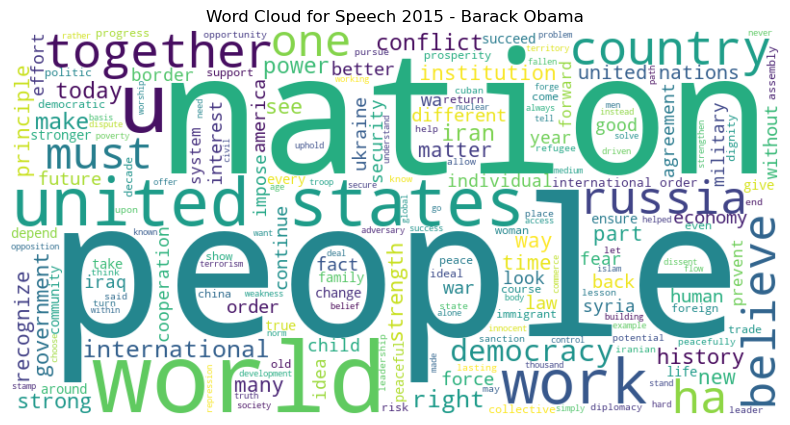

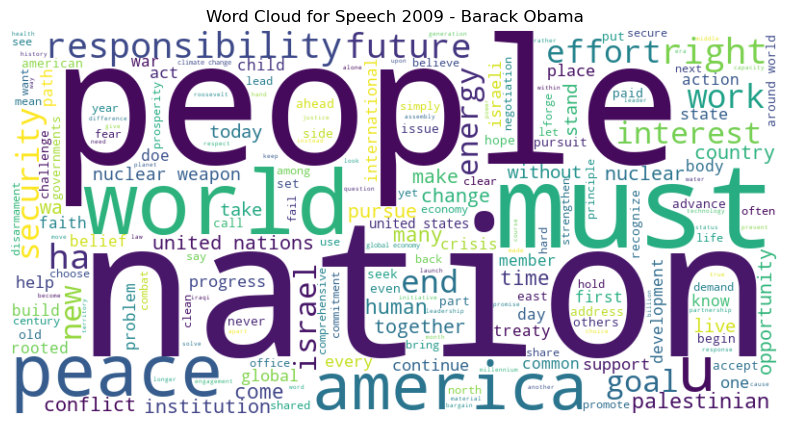

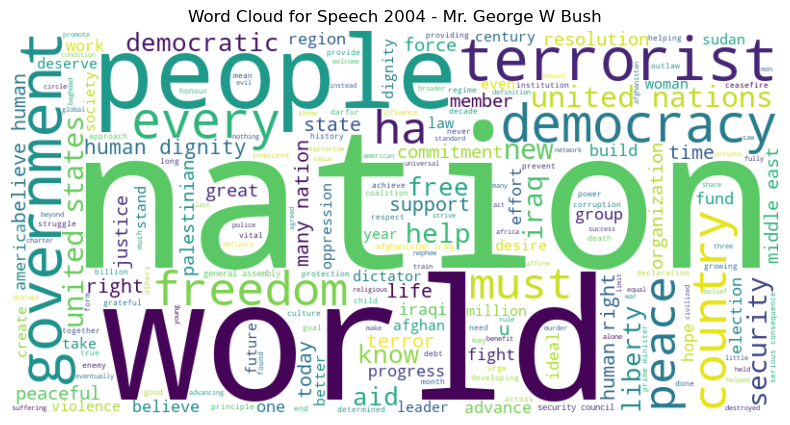

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Iterate through each row (speech)
for index, row in selected_speeches.iterrows():
    # Generate word cloud for the current speech
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(row['processed_text']))

    # Display the generated word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Speech {row['year']} - {row['speaker']}")
    plt.axis('off')
    plt.show()

In all three speeches, 'nation', 'people', and 'world' are prominent themes. The 2015 Barack Obama speech emphasizes 'united',  'states', 'together', and 'us' suggesting a focus on unity. The 2009 speech highlights 'must', 'peace', and 'america' reflecting a commitment to peace and national priorities. The 2004 George W. Bush speech discusses 'terrorist', 'democracy', 'government', and 'freedom' indicating a focus on global security and democratic principles.

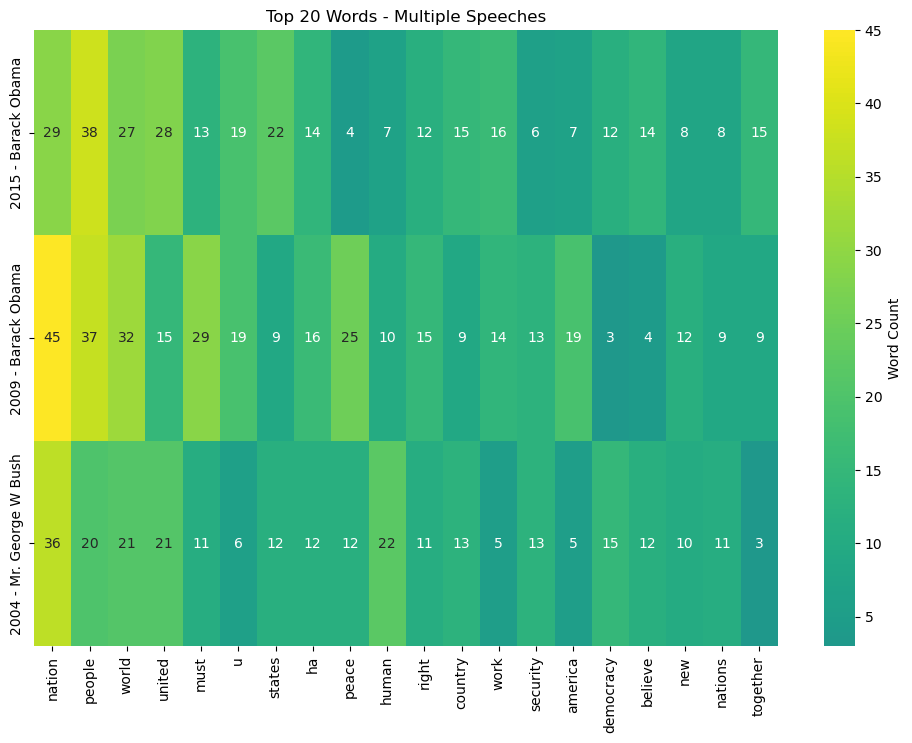

In [20]:
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Find top 20 words
top_20_words = [word for word, count in nltk.FreqDist(top_words).most_common(20)]

# Create a CountVectorizer to convert the text into a document-term matrix
vectorizer = CountVectorizer(vocabulary=top_20_words, token_pattern=r'(?u)\b\w+\b')
dtm = vectorizer.fit_transform(selected_speeches['processed_text'].apply(' '.join))

# Create a DataFrame with the word counts
word_counts = pd.DataFrame(dtm.toarray(), columns=top_20_words)

# Set the titles of the documents as the index
word_counts.index = selected_speeches['year'].astype(str) + ' - ' + selected_speeches['speaker']

# Create a centered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(word_counts, cmap='viridis', annot=True, fmt='d', center=0, cbar_kws={'label': 'Word Count'})
plt.title('Top 20 Words - Multiple Speeches')
plt.show()


From the visualization, it seem like the top 4 words are commonly found in the speeches. Notably, Barack Obama's 2009 address stands out for its frequent use of 'must', 'peace', and 'america', suggesting a focus on imperative actions and national harmony. George W. Bush's 2004 speech emphasizes the term 'human' more than others, hinting at a potential emphasis on humanity-related topics. In contrast, Barack Obama's 2015 speech seems to emphasize unity by combining 'united' and 'states' hinting at a thematic emphasis on national cohesion during that period.